**NLP (Word2Vec: CBOW & Skip-Gram)**

**What we learn today:**

- CBOW (Continuous Bag of Words) → Predict target word from context words.  
- Skip-Gram → Predict context words from target word.  
- Difference, examples, and small implementation.  


**CBOW vs Skip-Gram Explained**

**1. CBOW (Continuous Bag of Words)**  
- Goal: Predict the **target word** based on its surrounding **context words**.  
- Example: Sentence → "I live in India"  
  - Context = ["I", "in", "India"]  
  - Target = "live"  
- The model tries to guess **“live”** from the given context words.  
- Works well for **frequent words**, and training is **fast**.  

**2. Skip-Gram**  
- Goal: Predict the **context words** given the **target word**.  
- Example: Sentence → "I live in India"  
  - Target = "live"  
  - Context = ["I", "in", "India"]  
- The model tries to guess **["I", "in", "India"]** from the word **“live”**.  
- Better for **rare words**, but training is **slower**.  


**3. Key Difference**
- **CBOW → context → target word**  
- **Skip-Gram → target word → context**  



**4. Intuition**
- CBOW is like: *“Given the surrounding words, what word fits in the blank?”*  
- Skip-Gram is like: *“Given this word, what are the nearby words?”*  

    
**5. In Practice (Word2Vec)**
- Both CBOW and Skip-Gram learn **word embeddings** (dense vectors).  
- You can switch between them in Gensim with `sg=0` (CBOW) and `sg=1` (Skip-Gram).  


# Example Corpus
We’ll use a small text corpus for demonstration.

In [1]:
corpus = [
    ["india", "is", "a", "country"],
    ["delhi", "is", "the", "capital", "of", "india"],
    ["fruits", "like", "apple", "and", "mango"],
    ["england", "and", "uk", "are", "related"],
    ["bharat", "is", "another", "name", "for", "india"]
]


# Train CBOW Model  

CBOW → Input = context words, Output = target word.  
Faster, works better with frequent words.

In [2]:
from gensim.models import Word2Vec

# CBOW (sg=0)
cbow_model = Word2Vec(sentences=corpus, vector_size=50, window=3, min_count=1, sg=0)

print("Vector for 'india' (CBOW):\n", cbow_model.wv["india"])
print("\nMost similar to 'india' (CBOW):", cbow_model.wv.most_similar("india"))

Vector for 'india' (CBOW):
 [-0.01631583  0.0089916  -0.00827415  0.00164907  0.01699724 -0.00892435
  0.009035   -0.01357392 -0.00709698  0.01879702 -0.00315531  0.00064274
 -0.00828126 -0.01536538 -0.00301602  0.00493959 -0.00177605  0.01106732
 -0.00548595  0.00452013  0.01091159  0.01669191 -0.00290748 -0.01841629
  0.0087411   0.00114357  0.01488382 -0.00162657 -0.00527683 -0.01750602
 -0.00171311  0.00565313  0.01080286  0.01410531 -0.01140624  0.00371764
  0.01217773 -0.0095961  -0.00621452  0.01359526  0.00326295  0.00037983
  0.00694727  0.00043555  0.01923765  0.01012121 -0.01783478 -0.01408312
  0.00180291  0.01278507]

Most similar to 'india' (CBOW): [('capital', 0.22978785634040833), ('country', 0.16086997091770172), ('delhi', 0.1487838476896286), ('name', 0.12486250698566437), ('apple', 0.08061190694570541), ('bharat', 0.07399576157331467), ('is', 0.04237300902605057), ('another', 0.018277151510119438), ('fruits', 0.011398451402783394), ('and', 0.011071980930864811)]


# Train Skip-Gram Model  

Skip-Gram → Input = target word, Output = context words.  
Slower, but captures rare words better.


In [3]:
# Skip-Gram (sg=1)
skipgram_model = Word2Vec(sentences=corpus, vector_size=50, window=3, min_count=1, sg=1)

print("Vector for 'india' (Skip-Gram):\n", skipgram_model.wv["india"])
print("\nMost similar to 'india' (Skip-Gram):", skipgram_model.wv.most_similar("india"))

Vector for 'india' (Skip-Gram):
 [-0.01631583  0.0089916  -0.00827415  0.00164907  0.01699724 -0.00892435
  0.009035   -0.01357392 -0.00709698  0.01879702 -0.00315531  0.00064274
 -0.00828126 -0.01536538 -0.00301602  0.00493959 -0.00177605  0.01106732
 -0.00548595  0.00452013  0.01091159  0.01669191 -0.00290748 -0.01841629
  0.0087411   0.00114357  0.01488382 -0.00162657 -0.00527683 -0.01750602
 -0.00171311  0.00565313  0.01080286  0.01410531 -0.01140624  0.00371764
  0.01217773 -0.0095961  -0.00621452  0.01359526  0.00326295  0.00037983
  0.00694727  0.00043555  0.01923765  0.01012121 -0.01783478 -0.01408312
  0.00180291  0.01278507]

Most similar to 'india' (Skip-Gram): [('capital', 0.22978785634040833), ('country', 0.16086997091770172), ('delhi', 0.1487838476896286), ('name', 0.12486250698566437), ('apple', 0.08061076700687408), ('bharat', 0.07399576157331467), ('is', 0.04237300902605057), ('another', 0.018277151510119438), ('fruits', 0.011398451402783394), ('and', 0.011071978136897

# Visualization with PCA
We reduce embeddings to 2D and plot them.


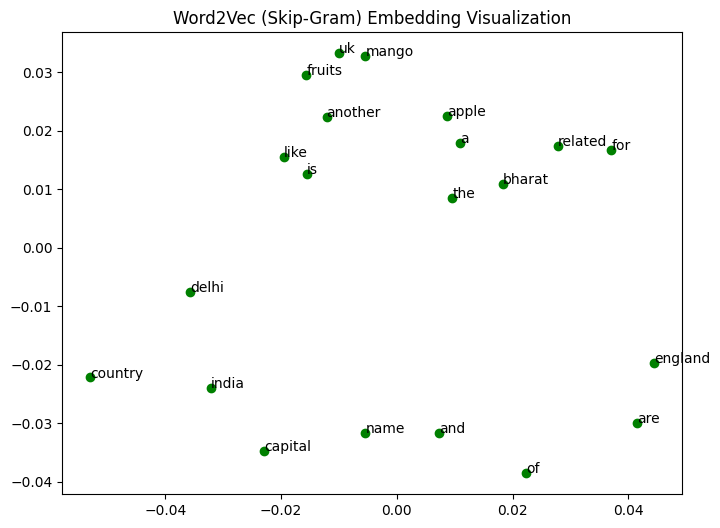

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Use Skip-Gram vectors for visualization
words = list(skipgram_model.wv.key_to_index.keys())
word_vectors = skipgram_model.wv[words]

pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

plt.figure(figsize=(8,6))
plt.scatter(reduced_vectors[:,0], reduced_vectors[:,1], c='green')

for i, word in enumerate(words):
    plt.annotate(word, xy=(reduced_vectors[i,0], reduced_vectors[i,1]))

plt.title("Word2Vec (Skip-Gram) Embedding Visualization")
plt.show()

# Key Insights
- CBOW → Predicts target from context, faster, frequent words.  
- Skip-Gram → Predicts context from target, better for rare words.  
- Both create **word embeddings** that capture meaning.  

## Real-World Applications:
- CBOW → Large datasets (e.g., News, Wikipedia).  
- Skip-Gram → Domain-specific tasks (e.g., Medical, Legal).  
- Used in **Search engines, Chatbots, Recommendation systems, LLMs**.  


# Recap: NLP Fundamentals  

Over the past few sessions, we explored the foundations of **Natural Language Processing (NLP)**.  
Here’s the journey in short:


## Text Preprocessing

- Tokenization, Stopwords removal, Lemmatization, Stemming.  
- Converting raw text into a clean format for ML/NLP tasks.  

## Text Representation

- Bag of Words (BoW).  
- TF-IDF (Term Frequency–Inverse Document Frequency).  
- Learned how frequency-based methods convert text into numerical vectors.  

## Word Embeddings Basics

- Difference between One-Hot Encoding & Embeddings.  
- Why embeddings capture **semantic meaning** while dummy variables don’t.  

## Word2Vec

- Trained Word2Vec models on small corpora.  
- Understood context-based word similarity (e.g., *king – man + woman = queen*).  
- PCA visualization of embeddings.  

## BoW vs TF-IDF vs Word2Vec

- Compared frequency-based and context-based methods.  
- Highlighted how Word2Vec learns meaning instead of just counting words.  

## CBOW & Skip-Gram

- **CBOW (Continuous Bag of Words):** Predicts target word from context → faster, better for frequent words.  
- **Skip-Gram:** Predicts context from target → slower, better for rare words.  
- Visualized embeddings with PCA.  

**Key Takeaways**

- **BoW** → Simple, but ignores meaning & order.  
- **TF-IDF** → Better, highlights important words.  
- **Word2Vec** → Learns true semantic relationships.  
- **CBOW vs Skip-Gram** → Tradeoff between speed & rare-word performance.  

**Real-World Applications**
    
- Text Classification (spam detection, sentiment analysis).  
- Semantic Search & Information Retrieval.  
- Chatbots & Virtual Assistants.  
- Recommendation Systems.  
- Foundation for **LLMs (Large Language Models)**.  
